In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

tot = pd.read_csv("Agg_tot_use1.csv")

# 연령을 정수로 변환
tot['AGE'] = tot['AGE'].apply(int)
tot.head()

,Year,STATE,COUNTY,RACE2,AGE5YR,SEX,count,binge,smoke,droc,AGE,STATE2,AGE_O
0,2002,1,Jefferson County,European,1,1,11,6,6,336,20,ALABAMA,18-24
1,2002,1,Jefferson County,European,1,2,10,5,4,170,20,ALABAMA,18-24
2,2002,1,Jefferson County,European,2,1,6,5,5,238,20,ALABAMA,25-29
3,2002,1,Jefferson County,European,2,2,15,1,2,133,20,ALABAMA,25-29
4,2002,1,Jefferson County,European,3,1,11,6,6,343,30,ALABAMA,30-34


In [55]:
# Vis1~3을 위한 전처리 작업
# (연도, 연령), 연도, 연령으로 각각 그룹화
# (연도, 연령)은 결합 분포 분석
# 연도와 연령 각각은 주변 분포 분석을 위해 쓰임
year_age_group = tot.groupby(['Year', 'AGE'])
year_group = tot.groupby('Year')
age_group = tot.groupby('AGE')

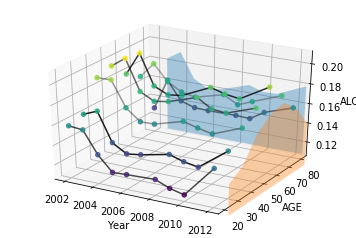

In [56]:
#Vis1 - 연도별, 연령별 음주량

## 연도, 연령 그룹별로 음주량과 빈도수를 카운트하여 데이터프레임을 만든다.
## 이하 코드는 Vis1~3까지 동일
age_group_alc1 = pd.DataFrame({'alc1' : year_age_group['droc'].sum()/ year_age_group['count'].sum() /100}).reset_index()
temp = []
verts = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha2 = 0.3
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(age_group_alc1['alc1']), vmax=max(age_group_alc1['alc1']))

for age in set(age_group_alc1['AGE']) :
    target = age_group_alc1[age_group_alc1['AGE'] == age]
    x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
    ax.plot(x, y, z, color='black', alpha = alpha2)
    ax.set_xlabel("Year")
    ax.set_ylabel("AGE")
    ax.set_zlabel("ALC1")
    ax.scatter(x, y, z, color= cmap(normalize(z)), alpha=0.8)
    alpha2 += 0.1

## 뒤에 파란색 음영처리된 연도별 주변 분포
age_total = pd.DataFrame({'alc1' : year_group['droc'].sum() / year_group['count'].sum()/100}).reset_index()
x, z = np.array(age_total['Year']), np.array(age_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.10,  z, alpha=0.2), zs=90, zdir='y')

## 우측에 주황색 음영처리된 연령별 주변 분포
year_total = pd.DataFrame({'alc1' : age_group['droc'].sum() / age_group['count'].sum()/100}).reset_index()
y, z = np.array(year_total['AGE']), np.array(year_total['alc1'])
ax.add_collection3d(plt.fill_between(y, 0.10,  z, alpha=0.2), zs=2013, zdir='x')
plt.show()

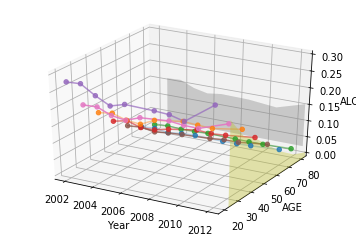

In [62]:
#Vis2 - 연도별, 연령별 과음 비율

age_group_alc1 = pd.DataFrame({'alc1' : year_age_group['binge'].sum()/ year_age_group['count'].sum()}).reset_index()
temp = []
verts = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha2 = 0.3
for age in set(age_group_alc1['AGE']) :
    target = age_group_alc1[age_group_alc1['AGE'] == age]
    x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
    ax.plot(x, y, z, alpha = alpha2)
    ax.set_xlabel("Year")
    ax.set_ylabel("AGE")
    ax.set_zlabel("ALC2")
    ax.scatter(x, y, z, alpha=0.8)
    alpha2 += 0.1

age_total = pd.DataFrame({'alc1' : year_group['binge'].sum() / year_group['count'].sum()}).reset_index()
x, z = np.array(age_total['Year']), np.array(age_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0,  z, alpha=0.2), zs=90, zdir='y')

year_total = pd.DataFrame({'alc1' : age_group['binge'].sum() / age_group['count'].sum()}).reset_index()
y, z = np.array(year_total['AGE']), np.array(year_total['alc1'])
ax.add_collection3d(plt.fill_between(y, 0,  z, alpha=0.2), zs=2013, zdir='x')
plt.show()

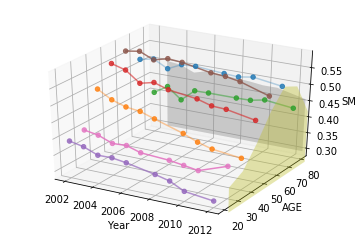

In [44]:
#Vis3 - 연도별, 연령별 흡연 비율
age_group_alc1 = pd.DataFrame({'alc1': year_age_group['smoke'].sum() / year_age_group['count'].sum()}).reset_index()
temp = []
verts = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha2 = 0.3

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(age_group_alc1['alc1']), vmax=max(age_group_alc1['alc1']))
for age in set(age_group_alc1['AGE']):
    target = age_group_alc1[age_group_alc1['AGE'] == age]
    x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
    ax.plot(x, y, z, alpha=alpha2)
    ax.set_xlabel("Year")
    ax.set_ylabel("AGE")
    ax.set_zlabel("SMK")
    ax.scatter(x, y, z, alpha=0.8)
    alpha2 += 0.1

age_total = pd.DataFrame({'alc1': year_group['smoke'].sum() / year_group['count'].sum()}).reset_index()
x, z = np.array(age_total['Year']), np.array(age_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.27, z, alpha=0.2), zs=90, zdir='y')

year_total = pd.DataFrame({'alc1': age_group['smoke'].sum() / age_group['count'].sum()}).reset_index()
y, z = np.array(year_total['AGE']), np.array(year_total['alc1'])
ax.add_collection3d(plt.fill_between(y, 0.27, z, alpha=0.2), zs=2013, zdir='x')
plt.show()

In [45]:
#Vis4~6을 위한 전처리

tot = pd.read_csv("Agg_tot_use1.csv")
tot['AGE'] = tot['AGE'].apply(int)

#깔끔한 시각화를 위해 연령을 몇 단위로 나누어준다
tot.loc[ (tot.AGE == 20) | (tot.AGE == 30), 'AGE'] = 20
tot.loc[ (tot.AGE == 40) | (tot.AGE == 50) | (tot.AGE == 60), 'AGE'] = 40
tot.loc[ (tot.AGE == 70) | (tot.AGE == 80),'AGE'] = 70

#이번에는 (연도, 연령, 인종)별로 그룹화
race_group = tot.groupby(['Year', 'AGE', 'RACE2'])

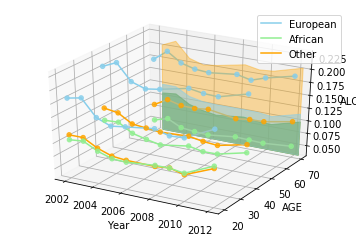

In [46]:
#Vis4 - 연도별, 연령별, 인종별 음주량
# 이하 코드는 Vis4~6까지 동일

## 그룹의 음주량으로 데이터프레임을 만든다.
race_group_alc1 = pd.DataFrame({'alc1': race_group['droc'].sum() / race_group['count'].sum()/ 100}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue', 'lightgreen']
lines = []

## 각 인종그룹별로 선을 여러개 그린다.
for (race, color) in zip(set(race_group_alc1['RACE2']), colors) :
    target2 = race_group_alc1[race_group_alc1['RACE2'] == race]
    for age in set(race_group_alc1['AGE']):
        target = target2[ target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color = color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("ALC1")
        ax.scatter(x, y, z, color = color, alpha=0.8)
a = [i for i in set(race_group_alc1['RACE2'])]
legend_elements = [Line2D([0], [0], color='skyblue', label=a[1]),
                   Line2D([0], [0], color='lightgreen', label=a[2]),
                   Line2D([0], [0], color='orange', label=a[0])]
tmp_1 = tot[tot.RACE2 == "African"].groupby(['Year'])
tmp_2 = tot[tot.RACE2 == "European"].groupby(['Year'])
tmp_3 = tot[tot.RACE2 == "Other"].groupby(['Year'])

## 각 인종에 대해 주변 분포를 그려주는 작업
race_total = pd.DataFrame({'alc1': tmp_1['droc'].sum() / tmp_1['count'].sum()/100 }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='green', alpha=0.4), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_2['droc'].sum() / tmp_2['count'].sum()/100 }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='orange', alpha=0.2), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_3['droc'].sum() / tmp_3['count'].sum()/100 }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='skyblue', alpha=0.3), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()

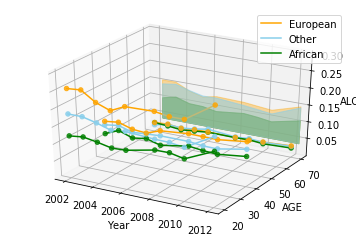

In [47]:
#Vis5 - 연도별, 연령별, 인종별 과음 비율
race_group_alc1 = pd.DataFrame({'alc1': race_group['binge'].sum() / race_group['count'].sum()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue', 'green']
lines = []
for (race, color) in zip(['European', 'Other', 'African'], colors):
    target2 = race_group_alc1[race_group_alc1['RACE2'] == race]
    for age in set(race_group_alc1['AGE']):
        target = target2[target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color=color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("ALC2")
        ax.scatter(x, y, z, color=color, alpha=0.8)
a = [i for i in set(race_group_alc1['RACE2'])]
legend_elements = [Line2D([0], [0], color='orange', label='European'),
                   Line2D([0], [0], color='skyblue', label='Other'),
                   Line2D([0], [0], color='green', label='African')]

tmp_1 = tot[tot.RACE2 == "African"].groupby(['Year'])
tmp_2 = tot[tot.RACE2 == "European"].groupby(['Year'])
tmp_3 = tot[tot.RACE2 == "Other"].groupby(['Year'])

race_total = pd.DataFrame({'alc1': tmp_1['binge'].sum() / tmp_1['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='green', alpha=0.4), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_2['binge'].sum() / tmp_2['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='orange', alpha=0.2), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_3['binge'].sum() / tmp_3['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.025, z, color='skyblue', alpha=0.3), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()

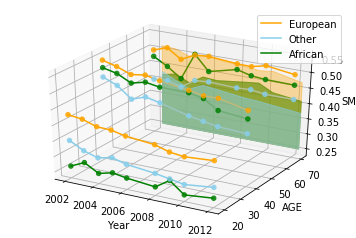

In [48]:
#Vis6 - 연도별, 연령별, 인종별 흡연 비율
race_group_alc1 = pd.DataFrame({'alc1': race_group['smoke'].sum() / race_group['count'].sum()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue', 'green']
lines = []
for (race, color) in zip(['European', 'Other', 'African'], colors):
    target2 = race_group_alc1[race_group_alc1['RACE2'] == race]
    for age in set(race_group_alc1['AGE']):
        target = target2[target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color=color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("SMK")
        ax.scatter(x, y, z, color=color, alpha=0.8)
a = [i for i in set(race_group_alc1['RACE2'])]
legend_elements = [Line2D([0], [0], color='orange', label='European'),
                   Line2D([0], [0], color='skyblue', label='Other'),
                   Line2D([0], [0], color='green', label='African')]

tmp_1 = tot[tot.RACE2 == "African"].groupby(['Year'])
tmp_2 = tot[tot.RACE2 == "European"].groupby(['Year'])
tmp_3 = tot[tot.RACE2 == "Other"].groupby(['Year'])

race_total = pd.DataFrame({'alc1': tmp_1['smoke'].sum() / tmp_1['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.24, z, color='green', alpha=0.4), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_2['smoke'].sum() / tmp_2['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.24, z, color='orange', alpha=0.2), zs=75, zdir='y')

race_total = pd.DataFrame({'alc1': tmp_3['smoke'].sum() / tmp_3['count'].sum() }).reset_index()
x, z = np.array(race_total['Year']), np.array(race_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.24, z, color='skyblue', alpha=0.3), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()

In [67]:
#Vis7~9를 위한 전처리
tot.loc[ (tot.AGE == 20) | (tot.AGE == 30), 'AGE'] = 20
tot.loc[ (tot.AGE == 40) | (tot.AGE == 50) | (tot.AGE == 60), 'AGE'] = 40
tot.loc[ (tot.AGE == 70) | (tot.AGE == 80),'AGE'] = 70

#이번에는 (연도, 연령, 성별)로 그룹화
sex_group = tot.groupby(['Year', 'AGE', 'SEX'])

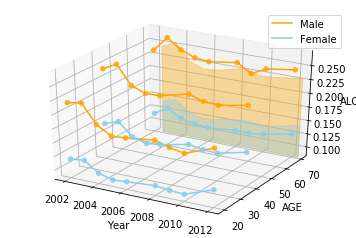

In [68]:
#Vis7 - 연도별, 연령별, 성별 음주량
# 이하 코드는 Vis7~9까지 동일

sex_group_alc1 = pd.DataFrame({'alc1': sex_group['droc'].sum() /sex_group['count'].sum()/100}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue']
lines = []
for (sex, color) in zip([1, 2], colors):
    target2 = sex_group_alc1[sex_group_alc1['SEX'] == sex]
    for age in set(sex_group_alc1['AGE']):
        target = target2[target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color=color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("ALC1")
        ax.scatter(x, y, z, color=color, alpha=0.8)
legend_elements = [Line2D([0], [0], color='orange', label='Male'),
                   Line2D([0], [0], color='skyblue', label='Female')]

tmp_1 = tot[tot.SEX == 1].groupby(['Year'])
tmp_2 = tot[tot.SEX == 2].groupby(['Year'])

sex_total = pd.DataFrame({'alc1': tmp_1['droc'].sum() / tmp_1['count'].sum()/100 }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.075, z, color='orange', alpha=0.2), zs=75, zdir='y')

sex_total = pd.DataFrame({'alc1': tmp_2['droc'].sum() / tmp_2['count'].sum()/100 }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.075, z, color='skyblue', alpha=0.2), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()

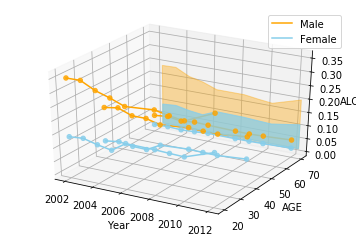

In [69]:
#Vis8 - 연도별, 연령별, 성별 과음 비율
sex_group_alc1 = pd.DataFrame({'alc1': sex_group['binge'].sum() / sex_group['count'].sum()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue']
lines = []
for (sex, color) in zip([1, 2], colors):
    target2 = sex_group_alc1[sex_group_alc1['SEX'] == sex]
    for age in set(sex_group_alc1['AGE']):
        target = target2[target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color=color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("ALC2")
        ax.scatter(x, y, z, color=color, alpha=0.8)
legend_elements = [Line2D([0], [0], color='orange', label='Male'),
                   Line2D([0], [0], color='skyblue', label='Female')]

tmp_1 = tot[tot.SEX == 1].groupby(['Year'])
tmp_2 = tot[tot.SEX == 2].groupby(['Year'])

sex_total = pd.DataFrame({'alc1': tmp_1['binge'].sum() / tmp_1['count'].sum() }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0, z, color='orange', alpha=0.2), zs=75, zdir='y')

sex_total = pd.DataFrame({'alc1': tmp_2['binge'].sum() / tmp_2['count'].sum() }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0, z, color='skyblue', alpha=0.5), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()


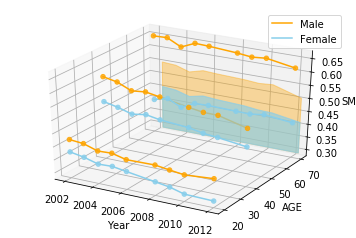

In [70]:
#Vis9- 연도별, 연령별, 성별 흡연 비율
sex_group_alc1 = pd.DataFrame({'alc1': sex_group['smoke'].sum() / sex_group['count'].sum()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'skyblue']
lines = []
for (sex, color) in zip([1, 2], colors):
    target2 = sex_group_alc1[sex_group_alc1['SEX'] == sex]
    for age in set(sex_group_alc1['AGE']):
        target = target2[target2['AGE'] == age]
        x, y, z = np.array(target['Year']), np.array(target['AGE']), np.array(target['alc1'])
        ax.plot(x, y, z, color=color, alpha=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("AGE")
        ax.set_zlabel("SMK")
        ax.scatter(x, y, z, color=color, alpha=0.8)
legend_elements = [Line2D([0], [0], color='orange', label='Male'),
                   Line2D([0], [0], color='skyblue', label='Female')]

tmp_1 = tot[tot.SEX == 1].groupby(['Year'])
tmp_2 = tot[tot.SEX == 2].groupby(['Year'])

sex_total = pd.DataFrame({'alc1': tmp_1['smoke'].sum() / tmp_1['count'].sum() }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.275, z, color='orange', alpha=0.2), zs=75, zdir='y')

sex_total = pd.DataFrame({'alc1': tmp_2['smoke'].sum() / tmp_2['count'].sum() }).reset_index()
x, z = np.array(sex_total['Year']), np.array(sex_total['alc1'])
ax.add_collection3d(plt.fill_between(x, 0.275, z, color='skyblue', alpha=0.4), zs=75, zdir='y')

ax.legend(handles=legend_elements)
plt.show()